# Importing the packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from sklearn.impute import SimpleImputer

pd.set_option('display.max_columns', 50)
%matplotlib inline

# Loading the dataset

This is the Santander Product Recommendation dataset from [Kaggle](https://www.kaggle.com/c/santander-product-recommendation/data).

In [3]:
train_path = 'data/train_ver2.csv'

df = pd.read_csv(train_path, parse_dates=['fecha_dato', 'fecha_alta', 'ult_fec_cli_1t'],
                 sep=",",na_values = ['?', 'NA'])

df.head(5)

/anaconda3/envs/mbml/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaT,1,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaT,1,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaT,1,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaT,1,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaT,1,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [4]:
test_path = 'data/test_ver2.csv'

test_df = pd.read_csv(test_path, parse_dates=['fecha_dato', 'fecha_alta', 'ult_fec_cli_1t'],
                      sep=",",na_values = ['?', 'NA'])

test_df.head(5)

/anaconda3/envs/mbml/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
0,2016-06-28,15889,F,ES,V,56,1995-01-16,0,256,1,NaT,1.0,A,S,N,N,KAT,N,1,28.0,MADRID,1,326124.90,01 - TOP
1,2016-06-28,1170544,N,ES,H,36,2013-08-28,0,34,1,NaT,1.0,I,S,N,NaN,KAT,N,1,3.0,ALICANTE,0,NA,02 - PARTICULARES
2,2016-06-28,1170545,N,ES,V,22,2013-08-28,0,34,1,NaT,1.0,A,S,N,NaN,KHE,N,1,15.0,"CORUÑA, A",1,NA,03 - UNIVERSITARIO
3,2016-06-28,1170547,N,ES,H,22,2013-08-28,0,34,1,NaT,1.0,I,S,N,NaN,KHE,N,1,8.0,BARCELONA,0,148402.98,03 - UNIVERSITARIO
4,2016-06-28,1170548,N,ES,H,22,2013-08-28,0,34,1,NaT,1.0,I,S,N,NaN,KHE,N,1,7.0,"BALEARS, ILLES",0,106885.80,03 - UNIVERSITARIO


In [5]:
columns_num = ['age',
               'renta']

columns_cat = ['ind_empleado', 
               'ncodpers',  
               'indrel',
               'pais_residencia', 
               'sexo','ind_nuevo', 
               'tiprel_1mes', 
               'indresi',
               'indrel_1mes',
               'indext',
               'canal_entrada',
               'conyuemp', 
               'indfall',
               'nomprov',
               'segmento',
               'tipodom',
               'cod_prov',
               'ind_actividad_cliente']

columns_date =['fecha_dato',
               'fecha_alta',
               'ult_fec_cli_1t']

# Descriptive Statistics & Visualization

In [190]:
print("age value statistics", df['age'].describe())
print("\n \n renta value statistics \n \n", df['renta'].describe())

print("categorical value statistics \n\n",df[columns_cat].describe())
print("date value statistics \n \n",df[columns_date].describe())

age value statistics count     13647309
unique         235
top             23
freq        542682
Name: age, dtype: int64

 
 renta value statistics 
 
 count    1.085293e+07
mean     1.342543e+05
std      2.306202e+05
min      1.202730e+03
25%      6.871098e+04
50%      1.018500e+05
75%      1.559560e+05
max      2.889440e+07
Name: renta, dtype: float64
categorical value statistics 

            ncodpers        indrel     ind_nuevo     tipodom      cod_prov  \
count  1.364731e+07  1.361958e+07  1.361958e+07  13619574.0  1.355372e+07   
mean   8.349042e+05  1.178399e+00  5.956184e-02         1.0  2.657147e+01   
std    4.315650e+05  4.177469e+00  2.366733e-01         0.0  1.278402e+01   
min    1.588900e+04  1.000000e+00  0.000000e+00         1.0  1.000000e+00   
25%    4.528130e+05  1.000000e+00  0.000000e+00         1.0  1.500000e+01   
50%    9.318930e+05  1.000000e+00  0.000000e+00         1.0  2.800000e+01   
75%    1.199286e+06  1.000000e+00  0.000000e+00         1.0  3.500000e+01

In [191]:
def plot_dates(datetimes, title):
    # Size of figure
    plt.figure(figsize=(15,8))

    # Plot the values
    sns.barplot(
        datetimes.index, 
        datetimes.values,
        alpha=0.7,
        color=(0, 0, 0.9)
    )

    # Make labels x: yyyymm format
    plt.xlabel('Year and month ', fontsize=16)
    plt.ylabel('Number of customers on date', fontsize=16)

    # Make xlabel vertical instead of horizontal
    plt.xticks(rotation='vertical')
    
    plt.suptitle(title, fontsize=24)

    plt.show()

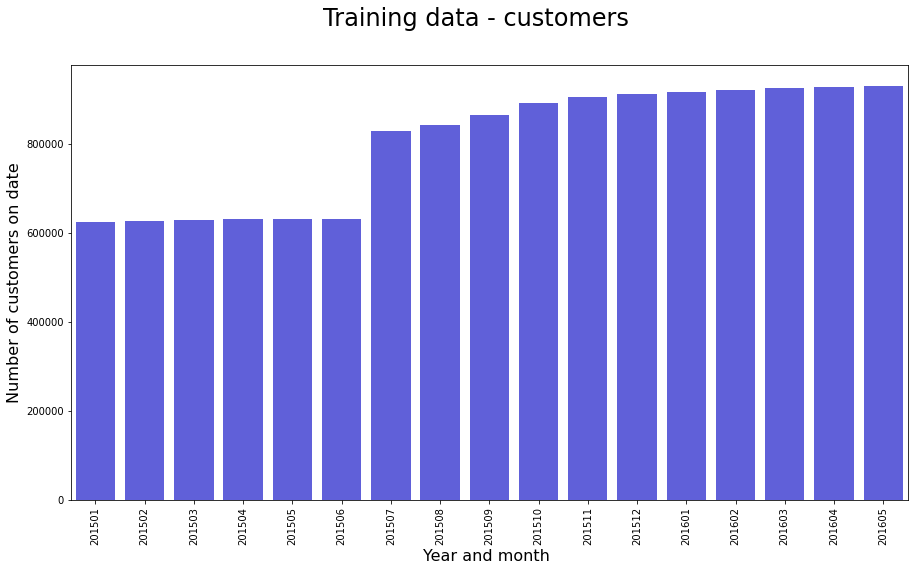

In [192]:
yearmonth = df['fecha_dato'].apply(
    lambda x: (100*x.year) + x.month
).value_counts()

plot_dates(yearmonth, 'Training data - customers')

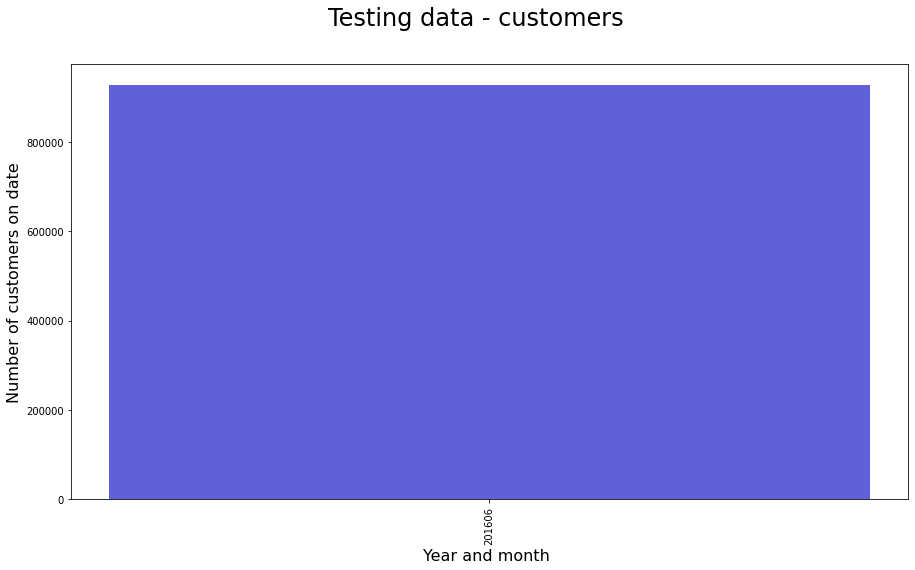

In [193]:
test_yearmonth = test_df['fecha_dato'].apply(
    lambda x: (100*x.year) + x.month
).value_counts()

plot_dates(test_yearmonth, 'Testing data - customers')

# Cleaning the dataset

In [6]:
print("Training NaN values percentages \n\n",(df.isna().sum()/df.shape[0])*100)
print("\n\n Testing NaN values percentages \n\n",(test_df.isna().sum()/test_df.shape[0])*100)

def nan_value_check(value):
    check = str(val).replace(' ', '').lower()
    if check == '?' or check == 'na' or check == 'nan':
        return True
    else:
        return False

Training NaN values percentages 

 fecha_dato                0.000000
ncodpers                  0.000000
ind_empleado              0.203220
pais_residencia           0.203220
sexo                      0.203732
age                       0.000000
fecha_alta                0.203220
ind_nuevo                 0.203220
antiguedad                0.000000
indrel                    0.203220
ult_fec_cli_1t           99.818330
indrel_1mes               1.097513
tiprel_1mes               1.097513
indresi                   0.203220
indext                    0.203220
conyuemp                 99.986752
canal_entrada             1.363829
indfall                   0.203220
tipodom                   0.203227
cod_prov                  0.685784
nomprov                   0.685784
ind_actividad_cliente     0.203220
renta                    20.475648
segmento                  1.387585
ind_ahor_fin_ult1         0.000000
ind_aval_fin_ult1         0.000000
ind_cco_fin_ult1          0.000000
ind_cder_fin_ult1   

## Removing the obvious features

We can clearly see that 'ult_fec_cli_1t' and 'conyuemp' should be removed, because they have almost 100% NaN values, which we cannot use for anything.

In [7]:
# remove columns with too many NaN values
drop_features = ['ult_fec_cli_1t', 'conyuemp']

In [8]:
df = df.drop(drop_features, axis=1)
test_df = test_df.drop(drop_features, axis=1)

In [9]:
columns_date.remove(drop_features[0])
columns_cat.remove(drop_features[1])

## The feature 'renta'

This feature has nan values, but not enough to where we want to drop it. Instead, we choose to prepare it for imputation.

In [10]:
# make nan values into numpy nan values
df['renta'] = df['renta'].fillna(np.nan)

# test data is type object
new_vals = []
for val in test_df['renta']:
    if nan_value_check(val):
        val = np.nan
    new_vals.append(val)
    
test_df['renta'] = np.array(new_vals, dtype=float)

## Imputation

We have chosen to impute the values for renta, since the feature could potentially have good predictive power, in terms of which products a customer might want to purchase.

In [11]:
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
df['renta'] = imputer.fit_transform(df['renta'].values.reshape(-1, 1))

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
test_df['renta'] = imputer.fit_transform(test_df['renta'].values.reshape(-1, 1))

print(df['renta'].isna().sum())
print(test_df['renta'].isna().sum())

0
0


## The rest of the data

We choose to drop the rest of the rows that contains NaN values, since we can see that it is such a small percentage that it won't matter.

In [12]:
df = df.dropna()
test_df = test_df.dropna()

### A quick check on the total number of NaN values

In [201]:
train_nan_values = 0
test_nan_values = 0

for name, values in df.iteritems():
    for val in values:
        if nan_value_check(val):
            train_nan_values += 1

for name, values in test_df.iteritems():
    for val in values:
        if nan_value_check(val):
            test_nan_values += 1
            
print(f'There are {train_nan_values} NaN values in training dataset')
print(f'There are {test_nan_values} NaN values in testing dataset')

There are 0 NaN values in training dataset
There are 0 NaN values in testing dataset


# Preparing X and Y values

In this section, we want to prepare our inputs and outputs of the model. In particular, we want to include the prior information of which products the customer is already paying for.

In [13]:
y_variables = ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1',
       'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1',
       'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
       'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1',
       'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
       'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1',
       'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
       'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1',
       'ind_recibo_ult1']

y_train = df[y_variables]
X_train = df
X_test = test_df

In [14]:
X_train.head(5)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,1,A,S,N,KHL,N,1.0,29.0,MALAGA,1.0,87218.100000,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,1,I,S,S,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.740000,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,1,I,S,N,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.110000,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,1,I,S,N,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.540000,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,1,A,S,N,KHE,N,1.0,50.0,ZARAGOZA,1.0,134254.318238,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


# Encoding the dataset

To be able to use our dataset, we must encode all features, so that they appear as numbers instead of strings, datetimes, or other datatypes.

## Columns of type 'object'

In [15]:
train_cat_encoded = pd.get_dummies(X_train[columns_cat])
test_cat_encoded = pd.get_dummies(X_test[columns_cat])

In [16]:
X_train = X_train.drop(columns_cat, axis=1)
X_test = X_test.drop(columns_cat, axis=1)

In [17]:
X_train = pd.concat([X_train, train_cat_encoded], axis=1)
X_test = pd.concat([X_test, test_cat_encoded], axis=1)

In [18]:
X_train.head(5)

,fecha_dato,age,fecha_alta,antiguedad,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,...,nomprov_MADRID,nomprov_MALAGA,nomprov_MELILLA,nomprov_MURCIA,nomprov_NAVARRA,nomprov_OURENSE,nomprov_PALENCIA,"nomprov_PALMAS, LAS",nomprov_PONTEVEDRA,"nomprov_RIOJA, LA",nomprov_SALAMANCA,nomprov_SANTA CRUZ DE TENERIFE,nomprov_SEGOVIA,nomprov_SEVILLA,nomprov_SORIA,nomprov_TARRAGONA,nomprov_TERUEL,nomprov_TOLEDO,nomprov_VALENCIA,nomprov_VALLADOLID,nomprov_ZAMORA,nomprov_ZARAGOZA,segmento_01 - TOP,segmento_02 - PARTICULARES,segmento_03 - UNIVERSITARIO
0,2015-01-28,35,2015-01-12,6,87218.100000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2015-01-28,23,2012-08-10,35,35548.740000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2015-01-28,23,2012-08-10,35,122179.110000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2015-01-28,22,2012-08-10,35,119775.540000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,2015-01-28,23,2012-08-10,35,134254.318238,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [19]:
X_test.head(5)

,fecha_dato,age,fecha_alta,antiguedad,renta,ncodpers,indrel,ind_nuevo,indrel_1mes,tipodom,cod_prov,ind_actividad_cliente,ind_empleado_A,ind_empleado_B,ind_empleado_F,ind_empleado_N,ind_empleado_S,pais_residencia_BO,pais_residencia_DE,pais_residencia_ES,pais_residencia_IT,pais_residencia_PY,sexo_H,sexo_V,tiprel_1mes_A,...,nomprov_MADRID,nomprov_MALAGA,nomprov_MELILLA,nomprov_MURCIA,nomprov_NAVARRA,nomprov_OURENSE,nomprov_PALENCIA,"nomprov_PALMAS, LAS",nomprov_PONTEVEDRA,"nomprov_RIOJA, LA",nomprov_SALAMANCA,nomprov_SANTA CRUZ DE TENERIFE,nomprov_SEGOVIA,nomprov_SEVILLA,nomprov_SORIA,nomprov_TARRAGONA,nomprov_TERUEL,nomprov_TOLEDO,nomprov_VALENCIA,nomprov_VALLADOLID,nomprov_ZAMORA,nomprov_ZARAGOZA,segmento_01 - TOP,segmento_02 - PARTICULARES,segmento_03 - UNIVERSITARIO
0,2016-06-28,56,1995-01-16,256,326124.900000,15889,1,0,1.0,1,28.0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2016-06-28,36,2013-08-28,34,134087.870595,1170544,1,0,1.0,1,3.0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2016-06-28,22,2013-08-28,34,134087.870595,1170545,1,0,1.0,1,15.0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2016-06-28,22,2013-08-28,34,148402.980000,1170547,1,0,1.0,1,8.0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2016-06-28,22,2013-08-28,34,106885.800000,1170548,1,0,1.0,1,7.0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Columns of type 'datetime64'

In [20]:
def datetime_to_features(timestamp):
    year = timestamp.year
    month = timestamp.month
    day = timestamp.day
    
    return year, month, day

In [21]:
def datetimes_to_features(dt_features):
    data = pd.DataFrame()
    for name, values in dt_features.iteritems():
        year = []
        month = []
        day = []

        for val in values:
            y,m,d = datetime_to_features(val)
            year.append(y) ; month.append(m) ; day.append(d)

        new_features = {name + '_year'  : year,
                        name + '_month' : month,
                        name + '_day'   : day}
        
        new_data = pd.DataFrame(new_features)
        data = pd.concat([data, new_data], axis=1)
        
    return data

In [22]:
train_new_features = datetimes_to_features(X_train[columns_date])
test_new_features = datetimes_to_features(X_test[columns_date])

In [23]:
X_train = X_train.drop(columns_date, axis=1)
X_test = X_test.drop(columns_date, axis=1)

In [24]:
X_train = pd.concat([X_train, train_new_features], axis=1)
X_test = pd.concat([X_test, test_new_features], axis=1)

In [25]:
X_train.head(5)

,age,antiguedad,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,...,nomprov_PALENCIA,"nomprov_PALMAS, LAS",nomprov_PONTEVEDRA,"nomprov_RIOJA, LA",nomprov_SALAMANCA,nomprov_SANTA CRUZ DE TENERIFE,nomprov_SEGOVIA,nomprov_SEVILLA,nomprov_SORIA,nomprov_TARRAGONA,nomprov_TERUEL,nomprov_TOLEDO,nomprov_VALENCIA,nomprov_VALLADOLID,nomprov_ZAMORA,nomprov_ZARAGOZA,segmento_01 - TOP,segmento_02 - PARTICULARES,segmento_03 - UNIVERSITARIO,fecha_dato_year,fecha_dato_month,fecha_dato_day,fecha_alta_year,fecha_alta_month,fecha_alta_day
0,35,6,87218.100000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2015.0,1.0,28.0,2015.0,1.0,12.0
1,23,35,35548.740000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2015.0,1.0,28.0,2012.0,8.0,10.0
2,23,35,122179.110000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2015.0,1.0,28.0,2012.0,8.0,10.0
3,22,35,119775.540000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2015.0,1.0,28.0,2012.0,8.0,10.0
4,23,35,134254.318238,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2015.0,1.0,28.0,2012.0,8.0,10.0


In [26]:
X_test.head(5)

,age,antiguedad,renta,ncodpers,indrel,ind_nuevo,indrel_1mes,tipodom,cod_prov,ind_actividad_cliente,ind_empleado_A,ind_empleado_B,ind_empleado_F,ind_empleado_N,ind_empleado_S,pais_residencia_BO,pais_residencia_DE,pais_residencia_ES,pais_residencia_IT,pais_residencia_PY,sexo_H,sexo_V,tiprel_1mes_A,tiprel_1mes_I,tiprel_1mes_P,...,nomprov_PALENCIA,"nomprov_PALMAS, LAS",nomprov_PONTEVEDRA,"nomprov_RIOJA, LA",nomprov_SALAMANCA,nomprov_SANTA CRUZ DE TENERIFE,nomprov_SEGOVIA,nomprov_SEVILLA,nomprov_SORIA,nomprov_TARRAGONA,nomprov_TERUEL,nomprov_TOLEDO,nomprov_VALENCIA,nomprov_VALLADOLID,nomprov_ZAMORA,nomprov_ZARAGOZA,segmento_01 - TOP,segmento_02 - PARTICULARES,segmento_03 - UNIVERSITARIO,fecha_dato_year,fecha_dato_month,fecha_dato_day,fecha_alta_year,fecha_alta_month,fecha_alta_day
0,56.0,256.0,326124.900000,15889.0,1.0,0.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2016.0,6.0,28.0,1995.0,1.0,16.0
1,36.0,34.0,134087.870595,1170544.0,1.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2016.0,6.0,28.0,2013.0,8.0,28.0
2,22.0,34.0,134087.870595,1170545.0,1.0,0.0,1.0,1.0,15.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2016.0,6.0,28.0,2013.0,8.0,28.0
3,22.0,34.0,148402.980000,1170547.0,1.0,0.0,1.0,1.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2016.0,6.0,28.0,2013.0,8.0,28.0
4,22.0,34.0,106885.800000,1170548.0,1.0,0.0,1.0,1.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2016.0,6.0,28.0,2013.0,8.0,28.0


# Checking Column Equality

In [27]:
not_in_test = []
for col in X_train.columns:
    if col not in X_test.columns and col not in y_variables:
        not_in_test.append(col)
        
print(not_in_test)

['indrel_1mes_1.0', 'indrel_1mes_2.0', 'indrel_1mes_3.0', 'indrel_1mes_1', 'indrel_1mes_1.0', 'indrel_1mes_2.0', 'indrel_1mes_3', 'indrel_1mes_3.0']


In [28]:
X_train = X_train.drop(not_in_test, axis=1)

In [29]:
X_train.head(5)

,age,antiguedad,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,...,nomprov_PALENCIA,"nomprov_PALMAS, LAS",nomprov_PONTEVEDRA,"nomprov_RIOJA, LA",nomprov_SALAMANCA,nomprov_SANTA CRUZ DE TENERIFE,nomprov_SEGOVIA,nomprov_SEVILLA,nomprov_SORIA,nomprov_TARRAGONA,nomprov_TERUEL,nomprov_TOLEDO,nomprov_VALENCIA,nomprov_VALLADOLID,nomprov_ZAMORA,nomprov_ZARAGOZA,segmento_01 - TOP,segmento_02 - PARTICULARES,segmento_03 - UNIVERSITARIO,fecha_dato_year,fecha_dato_month,fecha_dato_day,fecha_alta_year,fecha_alta_month,fecha_alta_day
0,35,6,87218.100000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2015.0,1.0,28.0,2015.0,1.0,12.0
1,23,35,35548.740000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2015.0,1.0,28.0,2012.0,8.0,10.0
2,23,35,122179.110000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2015.0,1.0,28.0,2012.0,8.0,10.0
3,22,35,119775.540000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2015.0,1.0,28.0,2012.0,8.0,10.0
4,23,35,134254.318238,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2015.0,1.0,28.0,2012.0,8.0,10.0


# Baseline

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

In [ ]:
predictions = lr.predict(X_test)

In [ ]:
ncodpers = X_test['ncodpers'].values

df = pd.DataFrame({'ncodpers':ncodpers, 'added_products': predictions})
df.

# Modeling

We are trying to predict the `y_variables` array as specified in the **[Preparing X and Y values](#Preparing-X-and-Y-values)**. We can submit these predictions to Kaggle and get a score on how well our model performed.